In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [123]:
os.chdir("C:/Users/TANIA DAS/Downloads")
diabetes=pd.read_csv("diabetes2.csv")

In [124]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [125]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [126]:
diabetes.shape

(768, 9)

In [127]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [128]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [129]:
dia_corr=diabetes.corr()
print(dia_corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

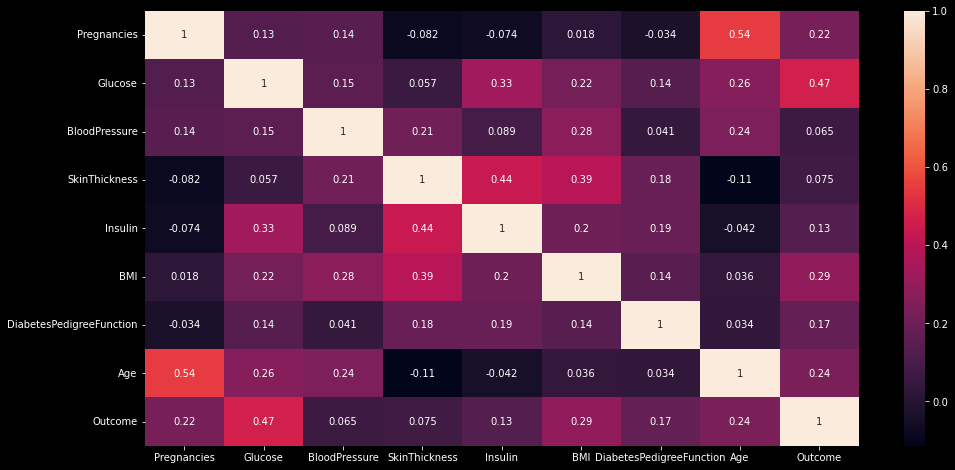

In [130]:
plt.subplots(figsize=(16,8))
sns.heatmap(dia_corr,annot=True)

In [131]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 0, 'INSULIN')

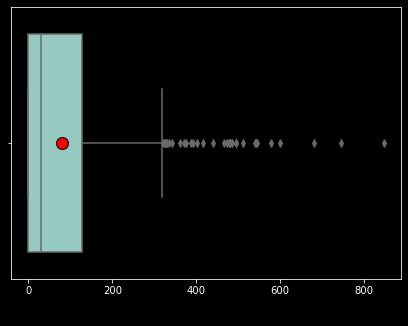

In [132]:
plt.subplots(figsize=(7,5))
sns.boxplot(diabetes['Insulin'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':12})
plt.xlabel("INSULIN",fontdict={'color':'black','fontsize':20})

In [133]:
print(diabetes['Insulin'].quantile(0.10))
print(diabetes['Insulin'].quantile(0.90))

0.0
210.0


In [134]:
diabetes['Insulin']=np.where(diabetes['Insulin']>210.0,210.0,diabetes['Insulin'])

Text(0.5, 0, 'INSULIN')

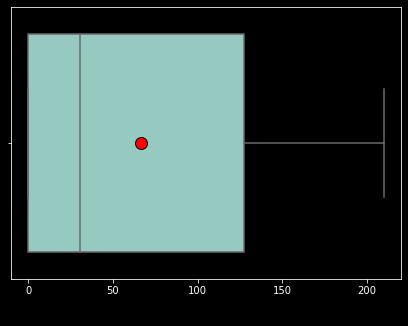

In [135]:
plt.subplots(figsize=(7,5))
sns.boxplot(diabetes['Insulin'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':12})
plt.xlabel("INSULIN",fontdict={'color':'black','fontsize':20})

Text(0.5, 0, 'PREGNANCY')

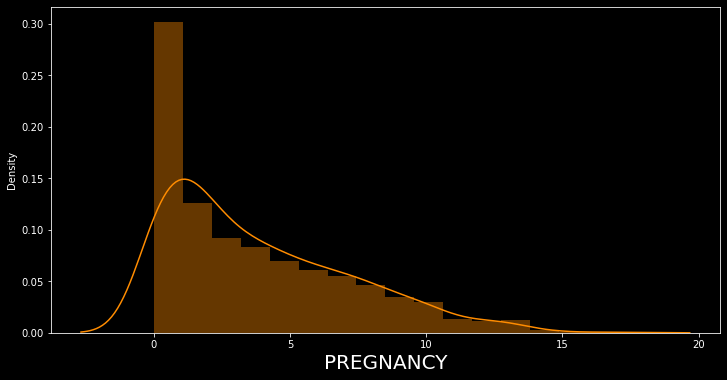

In [136]:
plt.subplots(figsize=(12,6))
plt.style.use('dark_background')
sns.distplot(diabetes['Pregnancies'],color='#FF8C00')
plt.xlabel("PREGNANCY",fontdict={'color':'white','fontsize':20})

Text(0.5, 0, 'GLUCOSE')

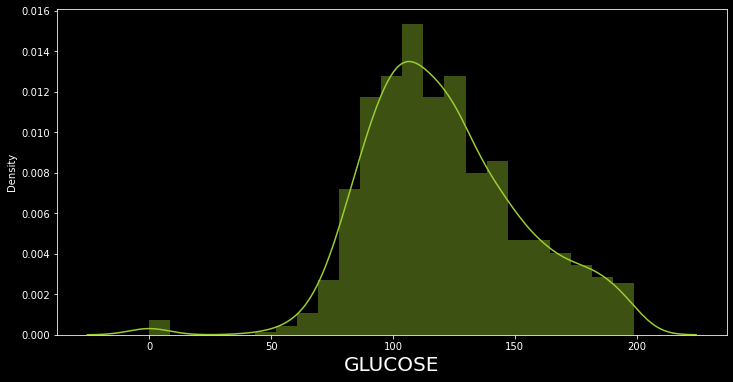

In [137]:
plt.subplots(figsize=(12,6))
plt.style.use('dark_background')
sns.distplot(diabetes['Glucose'],color='#9ACD32')
plt.xlabel("GLUCOSE",fontdict={'color':'white','fontsize':20})


Text(0.5, 0, 'BLOOD PRESSURE')

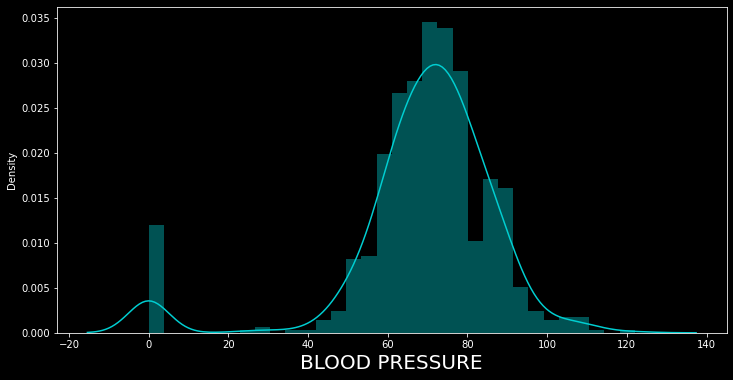

In [138]:
plt.subplots(figsize=(12,6))
plt.style.use('dark_background')
sns.distplot(diabetes['BloodPressure'],color='#00CED1')
plt.xlabel("BLOOD PRESSURE",fontdict={'color':'white','fontsize':20})

Text(0.5, 0, 'SKIN THICKNESS')

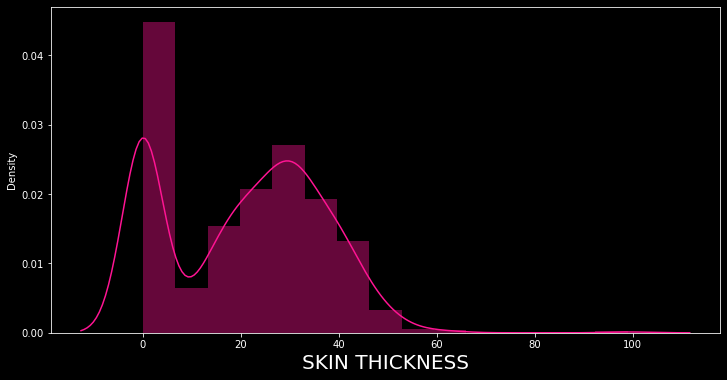

In [139]:
plt.subplots(figsize=(12,6))
plt.style.use('dark_background')
sns.distplot(diabetes['SkinThickness'],color='#FF1493')
plt.xlabel("SKIN THICKNESS",fontdict={'color':'white','fontsize':20})


Text(0.5, 0, 'INSULIN')

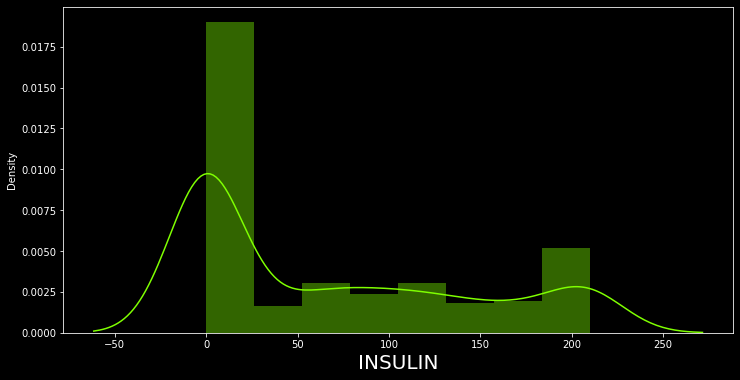

In [140]:
plt.subplots(figsize=(12,6))
plt.style.use('dark_background')
sns.distplot(diabetes['Insulin'],color='#7FFF00')
plt.xlabel("INSULIN",fontdict={'color':'white','fontsize':20})


Text(0.5, 0, 'BMI')

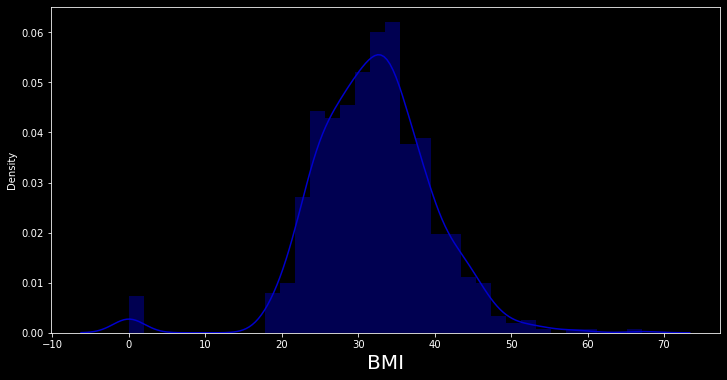

In [141]:
plt.subplots(figsize=(12,6))
plt.style.use('dark_background')
sns.distplot(diabetes['BMI'],color='#0000CD')
plt.xlabel("BMI",fontdict={'color':'white','fontsize':20})

Text(0.5, 0, 'PEDIGREE FUNCTION')

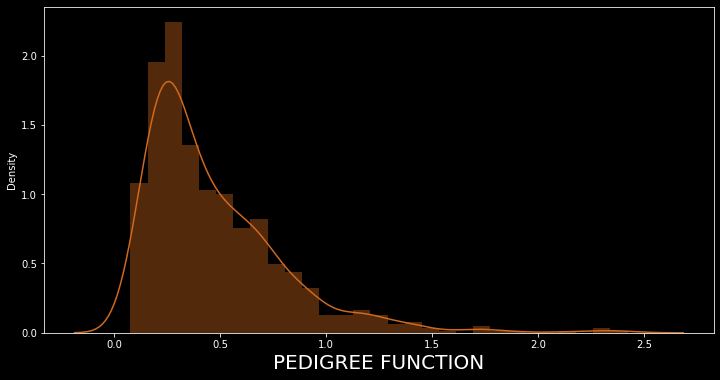

In [142]:
plt.subplots(figsize=(12,6))
plt.style.use('dark_background')
sns.distplot(diabetes['DiabetesPedigreeFunction'],color='#D2691E')
plt.xlabel("PEDIGREE FUNCTION",fontdict={'color':'white','fontsize':20})


Text(0.5, 0, 'AGE')

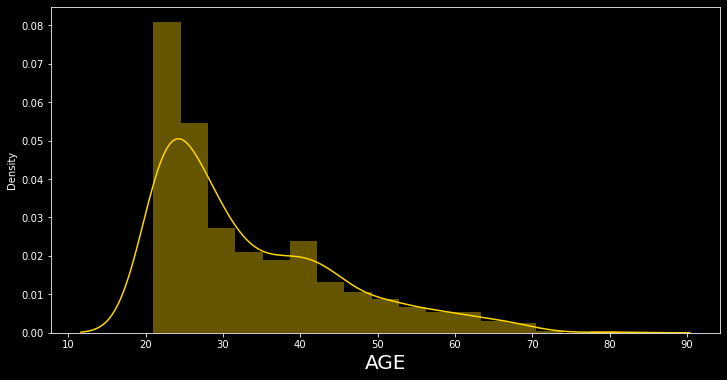

In [143]:
plt.subplots(figsize=(12,6))
plt.style.use('dark_background')
sns.distplot(diabetes['Age'],color='#FFD700')
plt.xlabel("AGE",fontdict={'color':'white','fontsize':20})


Text(0, 0.5, 'COUNT')

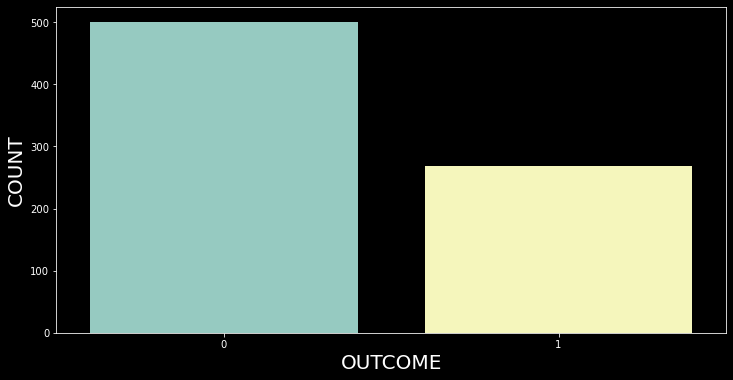

In [144]:
plt.subplots(figsize=(12,6))
sns.countplot(diabetes['Outcome'])
plt.xlabel('OUTCOME',fontdict={'color':'white','fontsize':20})
plt.ylabel('COUNT',fontdict={'color':'white','fontsize':20})

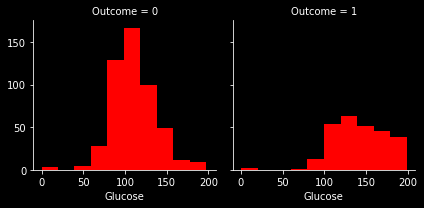

In [145]:
x=sns.FacetGrid(diabetes,col='Outcome')
x.map(plt.hist,'Glucose',color='red')

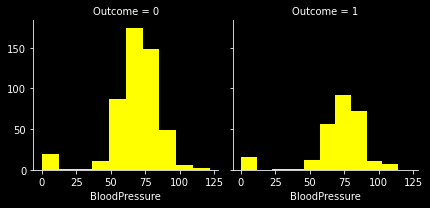

In [146]:
y=sns.FacetGrid(diabetes,col='Outcome')
y.map(plt.hist,'BloodPressure',color='yellow')

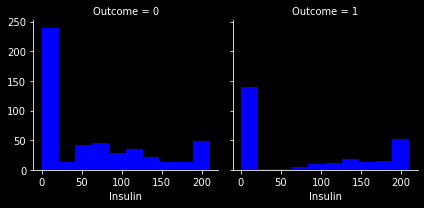

In [147]:
z=sns.FacetGrid(diabetes,col='Outcome')
z.map(plt.hist,'Insulin',color='blue')

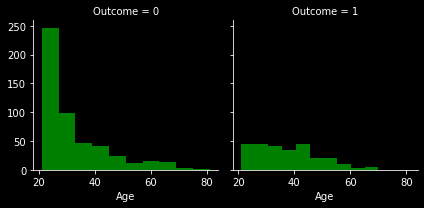

In [148]:
p=sns.FacetGrid(diabetes,col='Outcome')
p.map(plt.hist,'Age',color='green')

In [149]:
X=diabetes.iloc[:,[0,1,2,3,4,5,6,7]]
y=diabetes.iloc[:,8]

In [150]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [151]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [152]:
X_test=sm.add_constant(X_test)
X_train=sm.add_constant(X_train)

In [157]:
fitting=sm.Logit(y_train,X_train).fit(method='bfgs')
y_pred=fitting.predict(X_test)
fitting.summary2()

Optimization terminated successfully.
         Current function value: 0.484729
         Iterations: 31
         Function evaluations: 36
         Gradient evaluations: 36


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Pseudo R-squared:   0.258     
Dependent Variable:     Outcome            AIC:                609.2471  
Date:                   2022-05-14 20:02   BIC:                640.1870  
No. Observations:       614                Log-Likelihood:     -297.62   
Df Model:               6                  LL-Null:            -401.18   
Df Residuals:           607                LLR p-value:        5.8280e-42
Converged:              1.0000             Scale:              1.0000    
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                    -8.0484   0.7674 -10.4881 0.0000 -9.5524 -6.5443
Pregnancies               0.0933   0.0341   2.7383 0.0062  0.0265  0.1601
Glucose                   0.0319   0.0038   8.3490 0.0000  0.0244  0.0394
BloodPressure            -0.0133   0.0056  -2.3667 0.0179 -0.0244 -0.0023
BMI                       0.0886   0.0156   5.6710 0.0000  0.0580  0.1192
DiabetesPedigreeFunction  0.8592   0.3285   2.6152 0.0089  0.2153  1.5031
Age                       0.0210   0.0101   2.0797 0.0376  0.0012  0.0407
=========================================================================

"""

In [154]:
X_test=X_test.drop(['SkinThickness'],axis=1)
X_train=X_train.drop(['SkinThickness'],axis=1)

In [156]:
X_test=X_test.drop(['Insulin'],axis=1)
X_train=X_train.drop(['Insulin'],axis=1)

In [158]:
df=pd.DataFrame()
df['VIF']=[variance_inflation_factor(X_train.values,j)for j in range(X_train.shape[1])]
df['FEATURES']=X_train.columns

In [159]:
display(df)

,VIF,FEATURES
0,34.291744,const
1,1.420072,Pregnancies
2,1.160489,Glucose
3,1.139591,BloodPressure
4,1.152121,BMI
5,1.034889,DiabetesPedigreeFunction
6,1.559573,Age


In [160]:
y_pred=round(y_pred,0)

In [161]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[97 10]
 [18 29]]


In [163]:
accuracy=(97+29)/97+10+18+29
print("My model accuracy is",accuracy)

My model accuracy is 58.29896907216495


In [168]:
Sensitivity=29/29+18
print("Sensitivity is",Sensitivity)

Sensitivity is 19.0


In [169]:
Specificity=97/97+10
print("Specificity is",Specificity)

Specificity is 11.0


In [170]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



Text(0.5, 1.0, 'ROC CURVE')

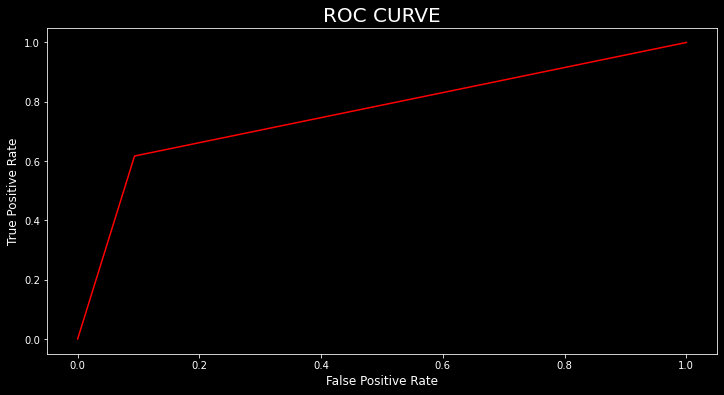

In [174]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,_=roc_curve(y_test,y_pred,drop_intermediate=False)
plt.figure(figsize=(12,6))
plt.plot(fpr,tpr,color='red')
plt.xlabel("False Positive Rate",fontdict={'color':'white','fontsize':12})
plt.ylabel("True Positive Rate",fontdict={'color':'white','fontsize':12})
plt.title("ROC CURVE",fontdict={'color':'white','fontsize':20})

In [176]:
auc_score=roc_auc_score(y_test,y_pred)
print("Area Under Curve Score is",auc_score)

Area Under Curve Score is 0.7617816663352556
